## 6

Fuente de datos: https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated?select=World-happiness-report-2024.csv

Los datos a utilizar serán:
- Ladder score: The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0.
- Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.

Entonces, se tienen los promedios de Apoyo social. Se desea saber los promedios de apoyo social tienen un efecto en los puntajes de felicidad.

## Carga de modulos

In [2]:
import pandas as pd
import numpy as np

import cufflinks as confleis

confleis.go_offline()

In [3]:
df = pd.read_csv("World-happiness-report-2024.csv")
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [4]:
# Uso de memoria por parte del tipo de variables
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 29.1 KB


In [6]:
# Convertir columnas de tipo object a tipo category para optimizar el uso de memoria
df["Regional indicator"] = df["Regional indicator"].astype("category")

# Podemos notar los siguientes cambios
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Country name                  143 non-null    object  
 1   Regional indicator            143 non-null    category
 2   Ladder score                  143 non-null    float64 
 3   upperwhisker                  143 non-null    float64 
 4   lowerwhisker                  143 non-null    float64 
 5   Log GDP per capita            140 non-null    float64 
 6   Social support                140 non-null    float64 
 7   Healthy life expectancy       140 non-null    float64 
 8   Freedom to make life choices  140 non-null    float64 
 9   Generosity                    140 non-null    float64 
 10  Perceptions of corruption     140 non-null    float64 
 11  Dystopia + residual           140 non-null    float64 
dtypes: category(1), float64(10), object(1)
memory usag

## Solución:

Se hara el filtrado de datos. Para esto, se eliminaran las columnas que no son de interés para la solución de la pregunta inicial.

In [10]:
# Se eliminarán las siguientes columnas:
df.drop(columns=['Country name', 'Regional indicator', 'upperwhisker', 'lowerwhisker', 'Log GDP per capita', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual'], inplace=True)

df

,Ladder score,Social support,Healthy life expectancy,Freedom to make life choices
0,7.741,1.572,0.695,0.859
1,7.583,1.520,0.699,0.823
2,7.525,1.617,0.718,0.819
3,7.344,1.501,0.724,0.838
4,7.341,1.513,0.740,0.641
...,...,...,...,...
138,3.295,0.665,0.262,0.473
139,3.245,0.566,0.253,0.469
140,3.186,0.851,0.000,0.523
141,2.707,0.577,0.556,0.173


Se tiene el siguiente gráfico, donde en el eje x se encuentran los datos relacionados al puntaje de felicidad y en el y el promedio de apoyo social:

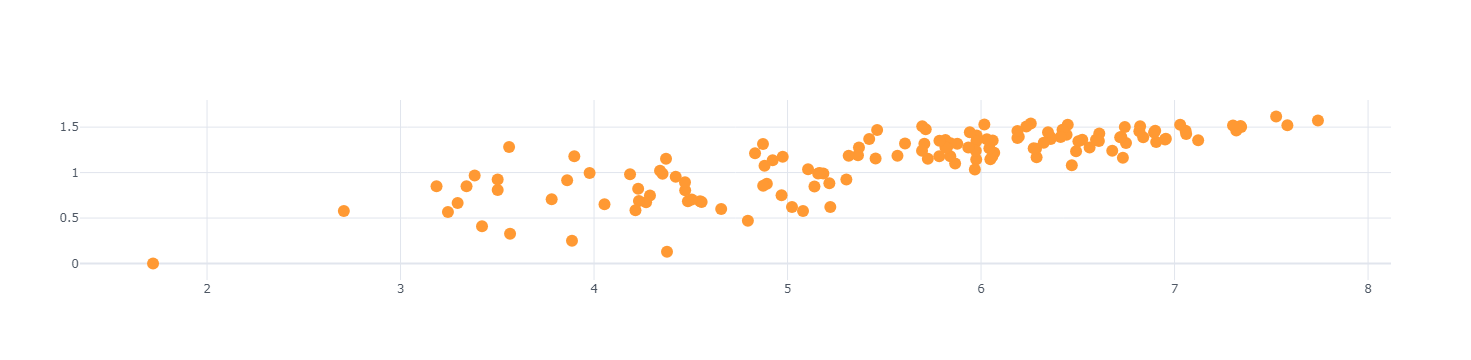

In [22]:
df.iplot(kind="scatter", x="Ladder score", y="Social support", mode="markers", theme="white")

Podemos notar que los datos parecen seguir una línea recta.

## Aplicación de regresión lineal simple

In [36]:
df.shape[0]

143

In [38]:
# Vemos la cantidad de valores ausentes en cada columna
df.isna().mean()

Ladder score                    0.000000
Social support                  0.020979
Healthy life expectancy         0.020979
Freedom to make life choices    0.020979
dtype: float64

In [39]:
df = df.dropna()
df.shape[0]

140

In [40]:
df.to_csv('RL.csv', index=False)